In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import sklearn
import scipy

In [2]:
data=pd.read_excel('C:\Diamond Price Prediction\data.xlsx')

In [3]:
data.head(2)

,PropertyType Name,Project,OrderStatus,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,InspectionDate,Sum of AdoptedArea,AdoptedAreaTypeName,BusinessCentre,BuinessDivision,Latitude,Longitude
0,Com-Office,Anantprabha,In Progress,"Anantprabha, Khopoli Industrial Area, Khalapur...",5040000,6000.0,2023-02-18,840.0,SuperBuiltUpArea,Mumbai,Consumer - Loan Against Property (LAP),18.788721,73.343686
1,Com-Office,NMSEZ Commercial Complex,In Progress,"Unit Nodn414, Plot No6, 4, Nmsez Commercial Co...",4845000,8500.0,2023-04-28,570.0,SuperBuiltUpArea,Mumbai,Consumer - Loan Against Property Vishwas (LAP ...,18.897568,72.984097


In [4]:
# there are total of 9034 rows and 13 columns 
data.shape

(9034, 13)

In [113]:
data.value_counts()

PropertyType Name   Project                   OrderStatus  InspectedAddress                                                                                                                                                                           Sum of MarketValue  Sum of AdoptedAreaRateINR  InspectionDate  Sum of AdoptedArea  AdoptedAreaTypeName  BusinessCentre  BuinessDivision                                           Latitude   Longitude
Com-Office          ---                       In Progress  Survey No. 7 & Cts No. 27b & 27a (Part), S. V. Road, Siddharth Nagar, Goregaon, Mumbai Suburban, Goregaon, Goregaon, Maharashtra, 400 104                                                  1237938677          9848.0                     2023-03-10      125695.0            BuiltUpArea          Mumbai          Consumer - Loan Against Property (LAP)                    19.151782  72.844186    1
Res-Flat/Apartment  Nilgiri-Lok Everest CHSL  In Progress  Nilgirilok Everest Chsl, Nilgirilok Everest Ch

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9034 entries, 0 to 9033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   PropertyType Name          9034 non-null   object        
 1   Project                    8868 non-null   object        
 2   OrderStatus                9034 non-null   object        
 3   InspectedAddress           8851 non-null   object        
 4   Sum of MarketValue         9034 non-null   int64         
 5   Sum of AdoptedAreaRateINR  8956 non-null   float64       
 6   InspectionDate             9032 non-null   datetime64[ns]
 7   Sum of AdoptedArea         8999 non-null   float64       
 8   AdoptedAreaTypeName        9001 non-null   object        
 9   BusinessCentre             9034 non-null   object        
 10  BuinessDivision            9034 non-null   object        
 11  Latitude                   9034 non-null   float64       
 12  Longit

In [115]:
# it seems the data provided for property type name have uneven data where some of the data can be dropped 
data['PropertyType Name'].unique()

array(['Com-Office', 'Com-Shop', 'Com-Showroom', 'Industrial', 'Plot',
       'Res-Flat/Apartment', 'Res-Floor', 'Res-Row House',
       'Res-Villa/Bungalow', 'Specialised Property', 'Warehouse'],
      dtype=object)

In [20]:
data['PropertyType Name'].value_counts()

Res-Flat/Apartment      6311
Com-Shop                 976
Com-Office               960
Industrial               462
Plot                     197
Res-Floor                 57
Res-Row House             28
Res-Villa/Bungalow        25
Warehouse                  9
Specialised Property       6
Com-Showroom               3
Name: PropertyType Name, dtype: int64

In [34]:
# here we got to know the different bussiness types where we have 8 ypes which can be encoded to train the data 
data['BuinessDivision'].unique()

array(['Consumer - Loan Against Property (LAP)',
       'Consumer - Loan Against Property Vishwas (LAP - Vishwas)',
       'Consumer - Working Capital (WC)',
       'Wholesale Banking - Small Medium Enterprise (SME)',
       'Consumer - Home Loan (HL)',
       'Consumer - Small Business Enterprise (SBE)',
       'Consumer - Emerging Mortgage Market (EMM)',
       'Commercial - Agri SME'], dtype=object)

In [39]:
# from the data below it seems thane have we less no of cases allotted which can be of done by mistake as well 
print(data['BusinessCentre'].unique())
print('\n=============\n')
print('no of cases for each bussiness centre \n',data['BusinessCentre'].value_counts())

['Mumbai' ' Thane']


no of cases for each bussiness centre 
 Mumbai    8968
 Thane      66
Name: BusinessCentre, dtype: int64


In [54]:
# the min max and data std deviation value 
data.describe()

,Sum of MarketValue,Sum of AdoptedAreaRateINR,Sum of AdoptedArea,Latitude,Longitude
count,9.034000e+03,8.956000e+03,8.999000e+03,9034.000000,9034.000000
mean,3.999261e+07,7.622371e+04,2.153088e+05,19.135679,72.907451
std,9.525517e+07,4.430201e+06,1.291169e+07,0.128221,0.103636
min,1.000000e+00,0.000000e+00,0.000000e+00,18.381759,72.691189
25%,9.591000e+06,1.400000e+04,5.795000e+02,19.044113,72.836973
50%,1.824000e+07,2.100000e+04,9.220000e+02,19.126046,72.863205
75%,3.802175e+07,3.195325e+04,1.530000e+03,19.210113,72.962881
max,4.069696e+09,4.189710e+08,1.089882e+09,19.998747,75.840394


In [116]:
# as we need to delete the no of thane indices 
#data_churn=data.drop(['BusinessCentre'],axis=1)

In [47]:
data_churn.head()

,PropertyType Name,Project,OrderStatus,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,InspectionDate,Sum of AdoptedArea,AdoptedAreaTypeName,BuinessDivision,Latitude,Longitude
0,Com-Office,Anantprabha,In Progress,"Anantprabha, Khopoli Industrial Area, Khalapur...",5040000,6000.0,2023-02-18,840.0,SuperBuiltUpArea,Consumer - Loan Against Property (LAP),18.788721,73.343686
1,Com-Office,NMSEZ Commercial Complex,In Progress,"Unit Nodn414, Plot No6, 4, Nmsez Commercial Co...",4845000,8500.0,2023-04-28,570.0,SuperBuiltUpArea,Consumer - Loan Against Property Vishwas (LAP ...,18.897568,72.984097
2,Com-Office,Freight Forwarders premises co-operative socie...,In Progress,Freight Forwarders Premises Cooperative Societ...,6102000,9000.0,2022-06-23,678.0,BuiltUpArea,Consumer - Working Capital (WC),18.897692,72.982617
3,Com-Office,Raheja Centre,In Progress,"501 To 503, 1959, 5th, Raheja Centre, Free Pre...",129648000,36500.0,2023-02-10,3552.0,BuiltUpArea,Wholesale Banking - Small Medium Enterprise (SME),18.923550,72.823340
4,Com-Office,Raheja Chambers Premises CSL,In Progress,"606, 213, 6th, Raheja Chambers Premises Csl, F...",24840000,36000.0,2022-11-15,690.0,BuiltUpArea,Wholesale Banking - Small Medium Enterprise (SME),18.923930,72.823520


In [117]:
print(data[data['BusinessCentre'].duplicated()].shape)
print('\n============\n')


(9032, 13)




In [118]:
data.isnull().sum()

PropertyType Name              0
Project                      166
OrderStatus                    0
InspectedAddress             183
Sum of MarketValue             0
Sum of AdoptedAreaRateINR     78
InspectionDate                 2
Sum of AdoptedArea            35
AdoptedAreaTypeName           33
BusinessCentre                 0
BuinessDivision                0
Latitude                       0
Longitude                      0
dtype: int64

In [53]:
data[data['Project'].isnull()]

,PropertyType Name,Project,OrderStatus,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,InspectionDate,Sum of AdoptedArea,AdoptedAreaTypeName,BusinessCentre,BuinessDivision,Latitude,Longitude
437,Com-Office,NaN,In Progress,"Plot No. A 756, Plot No. A 756, Plot No. A 756...",45000000,NaN,2023-03-17,0.0,BuiltUpArea,Mumbai,Consumer - Home Loan (HL),19.097613,73.024109
455,Com-Office,NaN,In Progress,"280, Cts No. 1637, 02nd Floor, Akshay Mittal I...",15595500,18500.0,2023-04-18,843.0,BuiltUpArea,Mumbai,Consumer - Working Capital (WC),19.104302,72.882034
554,Com-Office,NaN,In Progress,"Unit Nos02, Sector 10, 0, Navi Mumbai, Ghansol...",7882200,17400.0,2023-02-14,453.0,BuiltUpArea,Mumbai,Consumer - Loan Against Property (LAP),19.117842,72.994086
692,Com-Office,NaN,In Progress,"612, Cts No. 46/A,46/B, 06, Accord Classic, Na...",16224000,25271.0,2023-04-27,642.0,BuiltUpArea,Mumbai,Consumer - Loan Against Property (LAP),19.165767,72.851285
741,Com-Office,NaN,In Progress,"Office No. S18 S19 & S20, Cts No. 751, 751/1 T...",24528000,24000.0,2022-10-11,1022.0,SuperBuiltUpArea,Mumbai,Consumer - Loan Against Property (LAP),19.181734,72.845074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8863,Res-Flat/Apartment,NaN,Completed,"11, Cts No. 271, 272, 273, 02, The Tolaram Nag...",39305000,58942.0,2023-03-15,1990.0,BuiltUpArea,Thane,Consumer - Home Loan (HL),19.466918,72.796774
8968,Res-Row House,NaN,In Progress,"Row House No.B15/30, Sector No07, Ground+2 Upp...",8250000,10000.0,2023-01-13,825.0,SuperBuiltUpArea,Mumbai,Consumer - Emerging Mortgage Market (EMM),19.011933,73.113080
8973,Res-Row House,NaN,In Progress,"Warehouse Plot No54, Plot No54, 2, Navi Mumbai...",49498750,15331.0,2023-05-23,299.0,BuiltUpArea,Mumbai,Commercial - Agri SME,19.081228,73.005908
8980,Res-Row House,NaN,In Progress,"Row House No.173, Plot No 173, 2, Navi Mumbai,...",11695500,15013.0,2023-01-23,779.0,SuperBuiltUpArea,Mumbai,Consumer - Home Loan (HL),19.118635,73.000667


In [79]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9034 entries, 0 to 9033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   PropertyType Name          9034 non-null   object        
 1   Project                    8868 non-null   object        
 2   OrderStatus                9034 non-null   object        
 3   InspectedAddress           8851 non-null   object        
 4   Sum of MarketValue         9034 non-null   int64         
 5   Sum of AdoptedAreaRateINR  8956 non-null   float64       
 6   InspectionDate             9032 non-null   datetime64[ns]
 7   Sum of AdoptedArea         8999 non-null   float64       
 8   AdoptedAreaTypeName        9001 non-null   object        
 9   BusinessCentre             9034 non-null   object        
 10  BuinessDivision            9034 non-null   object        
 11  Latitude                   9034 non-null   float64       
 12  Longit

In [78]:
print(data.isnull().sum())

PropertyType Name              0
Project                      166
OrderStatus                    0
InspectedAddress             183
Sum of MarketValue             0
Sum of AdoptedAreaRateINR     78
InspectionDate                 2
Sum of AdoptedArea            35
AdoptedAreaTypeName           33
BusinessCentre                 0
BuinessDivision                0
Latitude                       0
Longitude                      0
dtype: int64


In [126]:
data['InspectionDate']=pd.to_datetime(data['InspectionDate'])

KeyError: 'InspectionDate'

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9034 entries, 0 to 9033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   PropertyType Name          9034 non-null   object        
 1   Project                    8868 non-null   object        
 2   OrderStatus                9034 non-null   object        
 3   InspectedAddress           8851 non-null   object        
 4   Sum of MarketValue         9034 non-null   int64         
 5   Sum of AdoptedAreaRateINR  8956 non-null   float64       
 6   InspectionDate             9032 non-null   datetime64[ns]
 7   Sum of AdoptedArea         8999 non-null   float64       
 8   AdoptedAreaTypeName        9001 non-null   object        
 9   BusinessCentre             9034 non-null   object        
 10  BuinessDivision            9034 non-null   object        
 11  Latitude                   9034 non-null   float64       
 12  Longit

In [3]:
data['year']=data['InspectionDate'].dt.year
data['month']=data['InspectionDate'].dt.month
data.head()
data.dtypes

PropertyType Name                    object
Project                              object
OrderStatus                          object
InspectedAddress                     object
Sum of MarketValue                    int64
Sum of AdoptedAreaRateINR           float64
InspectionDate               datetime64[ns]
Sum of AdoptedArea                  float64
AdoptedAreaTypeName                  object
BusinessCentre                       object
BuinessDivision                      object
Latitude                            float64
Longitude                           float64
year                                float64
month                               float64
dtype: object

In [4]:
data_churn=data.drop(['InspectionDate'],axis=1)

In [7]:
data_churn.head()

,PropertyType Name,Project,OrderStatus,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,Sum of AdoptedArea,AdoptedAreaTypeName,BusinessCentre,BuinessDivision,Latitude,Longitude,year,month
0,Com-Office,Anantprabha,In Progress,"Anantprabha, Khopoli Industrial Area, Khalapur...",5040000,6000.0,840.0,SuperBuiltUpArea,Mumbai,Consumer - Loan Against Property (LAP),18.788721,73.343686,2023.0,2.0
1,Com-Office,NMSEZ Commercial Complex,In Progress,"Unit Nodn414, Plot No6, 4, Nmsez Commercial Co...",4845000,8500.0,570.0,SuperBuiltUpArea,Mumbai,Consumer - Loan Against Property Vishwas (LAP ...,18.897568,72.984097,2023.0,4.0
2,Com-Office,Freight Forwarders premises co-operative socie...,In Progress,Freight Forwarders Premises Cooperative Societ...,6102000,9000.0,678.0,BuiltUpArea,Mumbai,Consumer - Working Capital (WC),18.897692,72.982617,2022.0,6.0
3,Com-Office,Raheja Centre,In Progress,"501 To 503, 1959, 5th, Raheja Centre, Free Pre...",129648000,36500.0,3552.0,BuiltUpArea,Mumbai,Wholesale Banking - Small Medium Enterprise (SME),18.923550,72.823340,2023.0,2.0
4,Com-Office,Raheja Chambers Premises CSL,In Progress,"606, 213, 6th, Raheja Chambers Premises Csl, F...",24840000,36000.0,690.0,BuiltUpArea,Mumbai,Wholesale Banking - Small Medium Enterprise (SME),18.923930,72.823520,2022.0,11.0


In [134]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9034 entries, 0 to 9033
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PropertyType Name          9034 non-null   object 
 1   Project                    8868 non-null   object 
 2   OrderStatus                9034 non-null   object 
 3   InspectedAddress           8851 non-null   object 
 4   Sum of MarketValue         9034 non-null   int64  
 5   Sum of AdoptedAreaRateINR  8956 non-null   float64
 6   Sum of AdoptedArea         8999 non-null   float64
 7   AdoptedAreaTypeName        9001 non-null   object 
 8   BusinessCentre             9034 non-null   object 
 9   BuinessDivision            9034 non-null   object 
 10  Latitude                   9034 non-null   float64
 11  Longitude                  9034 non-null   float64
 12  year                       9032 non-null   float64
 13  month                      9032 non-null   float

In [8]:
# since as we know that area type does not affect the overall rates as its a type of area and we can drop this column 
data_churn['AdoptedAreaTypeName'].unique()

array(['SuperBuiltUpArea', 'BuiltUpArea', 'CarpetArea', nan], dtype=object)

In [5]:
#since data of the Adopted rate NAN is very less we can delete said 
data_churn=data_churn.drop(['AdoptedAreaTypeName'],axis=1)

In [184]:
data_churn.head(2)



,PropertyType Name,Project,OrderStatus,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,Sum of AdoptedArea,BusinessCentre,BuinessDivision,Latitude,Longitude,year,month
0,Com-Office,Anantprabha,In Progress,"Anantprabha, Khopoli Industrial Area, Khalapur...",5040000,6000.0,840.0,Mumbai,Consumer - Loan Against Property (LAP),18.788721,73.343686,2023.0,2.0
1,Com-Office,NMSEZ Commercial Complex,In Progress,"Unit Nodn414, Plot No6, 4, Nmsez Commercial Co...",4845000,8500.0,570.0,Mumbai,Consumer - Loan Against Property Vishwas (LAP ...,18.897568,72.984097,2023.0,4.0


In [178]:
print(data_churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9034 entries, 0 to 9033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PropertyType Name          9034 non-null   object 
 1   Project                    8868 non-null   object 
 2   OrderStatus                9034 non-null   object 
 3   InspectedAddress           8851 non-null   object 
 4   Sum of MarketValue         9034 non-null   int64  
 5   Sum of AdoptedAreaRateINR  8956 non-null   float64
 6   Sum of AdoptedArea         9034 non-null   float64
 7   BusinessCentre             9034 non-null   object 
 8   BuinessDivision            9034 non-null   object 
 9   Latitude                   9034 non-null   float64
 10  Longitude                  9034 non-null   float64
 11  year                       9032 non-null   float64
 12  month                      9032 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage:

In [10]:
data_churn.isnull().sum()

PropertyType Name              0
Project                      166
OrderStatus                    0
InspectedAddress             183
Sum of MarketValue             0
Sum of AdoptedAreaRateINR     78
Sum of AdoptedArea            35
BusinessCentre                 0
BuinessDivision                0
Latitude                       0
Longitude                      0
year                           2
month                          2
dtype: int64

In [11]:
# Since we cannot drop the Nan values of the data and we have to put some value for the data to understand the lumpsum value we will assign the value to 1
data_churn['Sum of AdoptedArea'].isna().sum()

35

In [6]:
# Missing values oif the Sum of the adopted area in Comm., plot and other cases of lap and other vertivcals are assigned to 1 
data_churn['Sum of AdoptedArea'] = data_churn['Sum of AdoptedArea'].replace(np.nan, 1)

In [7]:
# now to check the data values 
data_churn[data_churn['Sum of AdoptedArea']==1]

,PropertyType Name,Project,OrderStatus,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,Sum of AdoptedArea,BusinessCentre,BuinessDivision,Latitude,Longitude,year,month
221,Com-Office,Steel Warehousing Complex,In Progress,"Plot No. 821, Steel Warehousing Complex, Steel...",3750000,NaN,1.0,Mumbai,Consumer - Loan Against Property (LAP),19.032199,73.107958,2023.0,1.0
222,Com-Office,Steel Warehousing Complex,In Progress,"Plot No. 822, Steel Warehousing Complex, Steel...",3750000,NaN,1.0,Mumbai,Consumer - Loan Against Property (LAP),19.032301,73.107829,2023.0,1.0
347,Com-Office,Goodwill Excellency,In Progress,"Shop No. 1 & 2, Plot No. 2, 1, Goodwill Excell...",418971000,418971000.0,1.0,Mumbai,Consumer - Home Loan (HL),19.070422,72.998082,2023.0,5.0
904,Com-Office,Triveni Grande Building,In Progress,"Triveni Grande Building, Kalyan West, Kalyan, ...",1,1.0,1.0,Mumbai,Consumer - Loan Against Property (LAP),19.260285,73.123894,2023.0,2.0
1622,Com-Shop,Sunrise Business Park,In Progress,"Sunrise Business Park, Thane West, Thane, Than...",1,1.0,1.0,Mumbai,Consumer - Loan Against Property (LAP),19.191688,72.952378,2023.0,2.0
1725,Com-Shop,N.A.,In Progress,"U.No.41, 45, 47, 44, Sheet No.25, Cts No. 1429...",13628900,NaN,1.0,Mumbai,Consumer - Small Business Enterprise (SBE),19.225448,73.164109,2023.0,1.0
2006,Industrial,Taloja Industrial Area,In Progress,"Plot No. B44, Taloja Industrial Area, Panvel I...",36654000,NaN,1.0,Mumbai,Consumer - Working Capital (WC),19.062865,73.108686,2022.0,8.0
2008,Industrial,Taloja Industrial Area,In Progress,"Plot No. C8/I, Taloja Industrial Area, Taloja ...",249900000,NaN,1.0,Mumbai,Consumer - Working Capital (WC),19.064450,73.119181,2022.0,6.0
2011,Industrial,"T.T.C. Industrial Area, MIDC",In Progress,"Plot No. D12/10, T.T.C. Industrial Area, Midc,...",21816000,NaN,1.0,Mumbai,Consumer - Loan Against Property (LAP),19.066397,73.030388,2022.0,6.0
2016,Industrial,Noble House CHSL,In Progress,"Garage No. 1, Plot No. 557, Ground Floor, Nobl...",4000000,4000000.0,1.0,Mumbai,Consumer - Working Capital (WC),19.073512,72.829840,2022.0,6.0


In [13]:
# Check for the other missing values 
# There seems to be 78 rows of Aum of Adopted Area rate to be nan 
# we need to check why its empty and what is the vertical type 
data_churn.isnull().sum()

PropertyType Name              0
Project                      166
OrderStatus                    0
InspectedAddress             183
Sum of MarketValue             0
Sum of AdoptedAreaRateINR     78
Sum of AdoptedArea             0
BusinessCentre                 0
BuinessDivision                0
Latitude                       0
Longitude                      0
year                           2
month                          2
dtype: int64

In [189]:

data_churn[data_churn['Sum of AdoptedAreaRateINR'].isnull()]

,PropertyType Name,Project,OrderStatus,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,Sum of AdoptedArea,BusinessCentre,BuinessDivision,Latitude,Longitude,year,month
221,Com-Office,Steel Warehousing Complex,In Progress,"Plot No. 821, Steel Warehousing Complex, Steel...",3750000,NaN,1.0,Mumbai,Consumer - Loan Against Property (LAP),19.032199,73.107958,2023.0,1.0
222,Com-Office,Steel Warehousing Complex,In Progress,"Plot No. 822, Steel Warehousing Complex, Steel...",3750000,NaN,1.0,Mumbai,Consumer - Loan Against Property (LAP),19.032301,73.107829,2023.0,1.0
437,Com-Office,NaN,In Progress,"Plot No. A 756, Plot No. A 756, Plot No. A 756...",45000000,NaN,0.0,Mumbai,Consumer - Home Loan (HL),19.097613,73.024109,2023.0,3.0
1198,Com-Shop,NaN,In Progress,"Plot No. 820, Plot No. 820, Plot No. 820, Road...",4375000,NaN,0.0,Mumbai,Consumer - Loan Against Property (LAP),19.032301,73.107829,2023.0,1.0
1725,Com-Shop,N.A.,In Progress,"U.No.41, 45, 47, 44, Sheet No.25, Cts No. 1429...",13628900,NaN,1.0,Mumbai,Consumer - Small Business Enterprise (SBE),19.225448,73.164109,2023.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7768,Res-Flat/Apartment,Gorai Chand Ganga CHSL,In Progress,"Gorai Chand Ganga Chsl, Gorai Chand Ganga Chsl...",13000000,NaN,0.0,Mumbai,Consumer - Home Loan (HL),19.225322,72.833212,2022.0,12.0
7867,Res-Flat/Apartment,Casa Serno,In Progress,"Casa Serno, Casa Serno, Thane West, Thane, Tha...",9254000,NaN,0.0,Mumbai,Consumer - Home Loan (HL),19.231266,73.054164,2022.0,12.0
7990,Res-Flat/Apartment,N.A.,In Progress,"Cts No. 1972, N.A., N.A., N.A., Ulhasnagar, Ul...",7926000,NaN,1.0,Mumbai,Consumer - Working Capital (WC),19.237481,73.157819,2023.0,5.0
8823,Res-Flat/Apartment,Vimal Residency,In Progress,"Vimal Residency, Vimal Residency, Nalasopara (...",3000000,NaN,0.0,Mumbai,Consumer - Home Loan (HL),19.429191,72.809841,2023.0,3.0


In [8]:
data_churn['Sum of AdoptedAreaRateINR']=data_churn['Sum of AdoptedAreaRateINR'].replace(np.nan,0)

In [191]:
data_churn.head(2)

,PropertyType Name,Project,OrderStatus,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,Sum of AdoptedArea,BusinessCentre,BuinessDivision,Latitude,Longitude,year,month
0,Com-Office,Anantprabha,In Progress,"Anantprabha, Khopoli Industrial Area, Khalapur...",5040000,6000.0,840.0,Mumbai,Consumer - Loan Against Property (LAP),18.788721,73.343686,2023.0,2.0
1,Com-Office,NMSEZ Commercial Complex,In Progress,"Unit Nodn414, Plot No6, 4, Nmsez Commercial Co...",4845000,8500.0,570.0,Mumbai,Consumer - Loan Against Property Vishwas (LAP ...,18.897568,72.984097,2023.0,4.0


In [192]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9034 entries, 0 to 9033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PropertyType Name          9034 non-null   object 
 1   Project                    8868 non-null   object 
 2   OrderStatus                9034 non-null   object 
 3   InspectedAddress           8851 non-null   object 
 4   Sum of MarketValue         9034 non-null   int64  
 5   Sum of AdoptedAreaRateINR  9034 non-null   float64
 6   Sum of AdoptedArea         9034 non-null   float64
 7   BusinessCentre             9034 non-null   object 
 8   BuinessDivision            9034 non-null   object 
 9   Latitude                   9034 non-null   float64
 10  Longitude                  9034 non-null   float64
 11  year                       9032 non-null   float64
 12  month                      9032 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage:

In [15]:
# It seems there is still 2 columns that have  null values lets inspect the unique values of the said columns 
data_churn.isnull().sum()

PropertyType Name              0
Project                      166
OrderStatus                    0
InspectedAddress             183
Sum of MarketValue             0
Sum of AdoptedAreaRateINR      0
Sum of AdoptedArea             0
BusinessCentre                 0
BuinessDivision                0
Latitude                       0
Longitude                      0
year                           2
month                          2
dtype: int64

In [16]:
# how come the inspected address and project is null lets find the columns respectively
print(data_churn['Project'].unique())
print('\n=======\n')
#print(data_churn['InspectedAddress'].unique())

['Anantprabha' 'NMSEZ Commercial Complex'
 'Freight Forwarders premises co-operative society ltd' ... 'plot no 56'
 'Kothati Warehouse No. 3' 'Kothari Warehousing No. 3 Premises CSL']




In [200]:
# OK as per the data below it is known that the project address and the project name is unknown in the case of com_office and plots type 
# Yet there seems to be a lot of errors in the data as plot is marked as property type Com_office 
# Also it seems some of the address are not mentioned properly which is then calculated as NAN by the system 
# Column project can be dropped as it have a lot of values which cannot be encoded and is not useful for training the data as well 
data_churn[data_churn['Project'].isnull()]

,PropertyType Name,Project,OrderStatus,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,Sum of AdoptedArea,BusinessCentre,BuinessDivision,Latitude,Longitude,year,month
437,Com-Office,NaN,In Progress,"Plot No. A 756, Plot No. A 756, Plot No. A 756...",45000000,0.0,0.0,Mumbai,Consumer - Home Loan (HL),19.097613,73.024109,2023.0,3.0
455,Com-Office,NaN,In Progress,"280, Cts No. 1637, 02nd Floor, Akshay Mittal I...",15595500,18500.0,843.0,Mumbai,Consumer - Working Capital (WC),19.104302,72.882034,2023.0,4.0
554,Com-Office,NaN,In Progress,"Unit Nos02, Sector 10, 0, Navi Mumbai, Ghansol...",7882200,17400.0,453.0,Mumbai,Consumer - Loan Against Property (LAP),19.117842,72.994086,2023.0,2.0
692,Com-Office,NaN,In Progress,"612, Cts No. 46/A,46/B, 06, Accord Classic, Na...",16224000,25271.0,642.0,Mumbai,Consumer - Loan Against Property (LAP),19.165767,72.851285,2023.0,4.0
741,Com-Office,NaN,In Progress,"Office No. S18 S19 & S20, Cts No. 751, 751/1 T...",24528000,24000.0,1022.0,Mumbai,Consumer - Loan Against Property (LAP),19.181734,72.845074,2022.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8863,Res-Flat/Apartment,NaN,Completed,"11, Cts No. 271, 272, 273, 02, The Tolaram Nag...",39305000,58942.0,1990.0,Thane,Consumer - Home Loan (HL),19.466918,72.796774,2023.0,3.0
8968,Res-Row House,NaN,In Progress,"Row House No.B15/30, Sector No07, Ground+2 Upp...",8250000,10000.0,825.0,Mumbai,Consumer - Emerging Mortgage Market (EMM),19.011933,73.113080,2023.0,1.0
8973,Res-Row House,NaN,In Progress,"Warehouse Plot No54, Plot No54, 2, Navi Mumbai...",49498750,15331.0,299.0,Mumbai,Commercial - Agri SME,19.081228,73.005908,2023.0,5.0
8980,Res-Row House,NaN,In Progress,"Row House No.173, Plot No 173, 2, Navi Mumbai,...",11695500,15013.0,779.0,Mumbai,Consumer - Home Loan (HL),19.118635,73.000667,2023.0,1.0


In [9]:
data_churn_new=data_churn.drop(['Project'],axis=1)

In [203]:
data_churn_new.head()

,PropertyType Name,OrderStatus,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,Sum of AdoptedArea,BusinessCentre,BuinessDivision,Latitude,Longitude,year,month
0,Com-Office,In Progress,"Anantprabha, Khopoli Industrial Area, Khalapur...",5040000,6000.0,840.0,Mumbai,Consumer - Loan Against Property (LAP),18.788721,73.343686,2023.0,2.0
1,Com-Office,In Progress,"Unit Nodn414, Plot No6, 4, Nmsez Commercial Co...",4845000,8500.0,570.0,Mumbai,Consumer - Loan Against Property Vishwas (LAP ...,18.897568,72.984097,2023.0,4.0
2,Com-Office,In Progress,Freight Forwarders Premises Cooperative Societ...,6102000,9000.0,678.0,Mumbai,Consumer - Working Capital (WC),18.897692,72.982617,2022.0,6.0
3,Com-Office,In Progress,"501 To 503, 1959, 5th, Raheja Centre, Free Pre...",129648000,36500.0,3552.0,Mumbai,Wholesale Banking - Small Medium Enterprise (SME),18.923550,72.823340,2023.0,2.0
4,Com-Office,In Progress,"606, 213, 6th, Raheja Chambers Premises Csl, F...",24840000,36000.0,690.0,Mumbai,Wholesale Banking - Small Medium Enterprise (SME),18.923930,72.823520,2022.0,11.0


<AxesSubplot:>

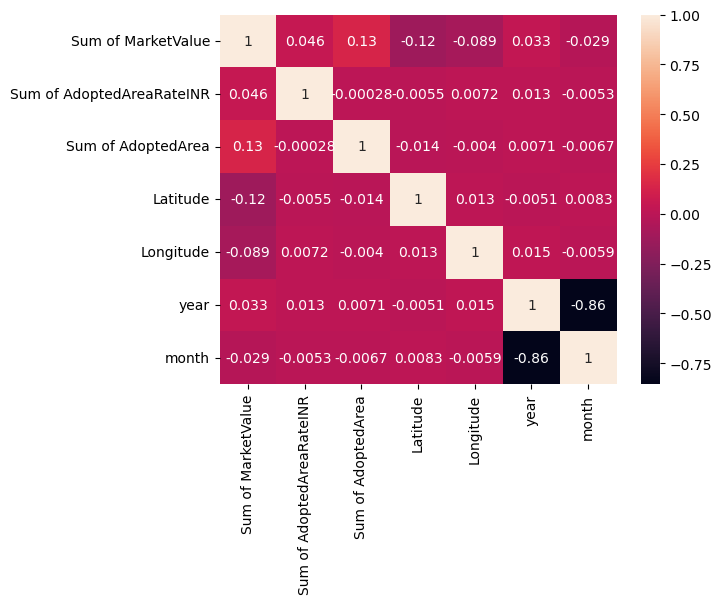

In [205]:
# lets find the correlation of the data 
data_churn_new.corr()
sns.heatmap(data_churn_new.corr(),annot=True)

In [19]:
# Now as we will encode all the data for better correlation of the data with the predicted values from the data available 
data_churn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9034 entries, 0 to 9033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PropertyType Name          9034 non-null   object 
 1   OrderStatus                9034 non-null   object 
 2   InspectedAddress           8851 non-null   object 
 3   Sum of MarketValue         9034 non-null   int64  
 4   Sum of AdoptedAreaRateINR  9034 non-null   float64
 5   Sum of AdoptedArea         9034 non-null   float64
 6   BusinessCentre             9034 non-null   object 
 7   BuinessDivision            9034 non-null   object 
 8   Latitude                   9034 non-null   float64
 9   Longitude                  9034 non-null   float64
 10  year                       9032 non-null   float64
 11  month                      9032 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 847.1+ KB


In [10]:
# filtering of the data for encoding is required and is done below 
data_churn_new['OrderStatus'].value_counts()
data_churn_new_1=data_churn_new[data_churn_new['OrderStatus'].str.contains('Completed|In Progress')]

In [65]:
# As we can see our new data for Order Status is created this was done for removing the rows which data is not required and dont want it to be encoded and further we will process more data 
data_churn_new_1['OrderStatus'].value_counts()

In Progress    8515
Completed       516
Name: OrderStatus, dtype: int64

In [66]:
# the changes can be seen below the order status which have 3 entries of Cancelled_started have been deleted 
print('The total values after the drop of cancelled started data ',data_churn_new_1.shape)
print('previous data ',data_churn_new.shape)

The total values after the drop of cancelled started data  (9031, 12)
previous data  (9034, 12)


In [11]:
# Now we can simply drop the column of Order status as its of no use to predict the value 
data_churn_new_1=data_churn_new_1.drop(['OrderStatus'],axis=1)

In [78]:
data_churn_new_1.head()

,PropertyType Name,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,Sum of AdoptedArea,BusinessCentre,BuinessDivision,Latitude,Longitude,year,month
0,Com-Office,"Anantprabha, Khopoli Industrial Area, Khalapur...",5040000,6000.0,840.0,Mumbai,Consumer - Loan Against Property (LAP),18.788721,73.343686,2023.0,2.0
1,Com-Office,"Unit Nodn414, Plot No6, 4, Nmsez Commercial Co...",4845000,8500.0,570.0,Mumbai,Consumer - Loan Against Property Vishwas (LAP ...,18.897568,72.984097,2023.0,4.0
2,Com-Office,Freight Forwarders Premises Cooperative Societ...,6102000,9000.0,678.0,Mumbai,Consumer - Working Capital (WC),18.897692,72.982617,2022.0,6.0
3,Com-Office,"501 To 503, 1959, 5th, Raheja Centre, Free Pre...",129648000,36500.0,3552.0,Mumbai,Wholesale Banking - Small Medium Enterprise (SME),18.923550,72.823340,2023.0,2.0
4,Com-Office,"606, 213, 6th, Raheja Chambers Premises Csl, F...",24840000,36000.0,690.0,Mumbai,Wholesale Banking - Small Medium Enterprise (SME),18.923930,72.823520,2022.0,11.0


In [80]:
data_churn_new_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9031 entries, 0 to 9033
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PropertyType Name          9031 non-null   object 
 1   InspectedAddress           8848 non-null   object 
 2   Sum of MarketValue         9031 non-null   int64  
 3   Sum of AdoptedAreaRateINR  9031 non-null   float64
 4   Sum of AdoptedArea         9031 non-null   float64
 5   BusinessCentre             9031 non-null   object 
 6   BuinessDivision            9031 non-null   object 
 7   Latitude                   9031 non-null   float64
 8   Longitude                  9031 non-null   float64
 9   year                       9029 non-null   float64
 10  month                      9029 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 846.7+ KB


In [81]:
data_churn_new_1.isnull().sum()

PropertyType Name              0
InspectedAddress             183
Sum of MarketValue             0
Sum of AdoptedAreaRateINR      0
Sum of AdoptedArea             0
BusinessCentre                 0
BuinessDivision                0
Latitude                       0
Longitude                      0
year                           2
month                          2
dtype: int64

In [109]:
#There seems to be 2 rows that are having NAN values after data reconfig 
data_churn_new_1[data_churn_new_1['month'].isnull()]

,PropertyType Name,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,Sum of AdoptedArea,BusinessCentre,BuinessDivision,Latitude,Longitude,year,month
6568,Res-Flat/Apartment,"Block No. 50, Room No. 6b, Block No. 50, Room ...",6102000,18000.0,1.0,Mumbai,Consumer - Loan Against Property Vishwas (LAP ...,19.175867,72.938437,NaN,NaN
7480,Res-Flat/Apartment,"Gundecha Trillum Chsl, Gundecha Trillum Chsl, ...",25320000,30000.0,1.0,Mumbai,Consumer - Home Loan (HL),19.214771,72.870199,NaN,NaN


In [12]:
# Now those 2 rows are dropped 
data_chrun_new_2=data_churn_new_1.dropna(subset=['month'])

In [120]:
# Handling of the Missing data of the Inspected address have to be done but first extraction is to be done for datatypes 
data_chrun_new_2.isnull().sum()

PropertyType Name              0
InspectedAddress             183
Sum of MarketValue             0
Sum of AdoptedAreaRateINR      0
Sum of AdoptedArea             0
BusinessCentre                 0
BuinessDivision                0
Latitude                       0
Longitude                      0
year                           0
month                          0
dtype: int64

In [92]:
# Total no of the data 
data_chrun_new_2.shape

(9029, 11)

In [93]:
data_chrun_new_2['BuinessDivision'].value_counts()

Consumer - Home Loan (HL)                                   3928
Consumer - Loan Against Property (LAP)                      2347
Consumer - Working Capital (WC)                             1285
Consumer - Emerging Mortgage Market (EMM)                    572
Consumer - Small Business Enterprise (SBE)                   533
Wholesale Banking - Small Medium Enterprise (SME)            254
Consumer - Loan Against Property Vishwas (LAP - Vishwas)      94
Commercial - Agri SME                                         16
Name: BuinessDivision, dtype: int64

In [117]:
# here we can check for the values of the Thane data to be process or to be dropped or encoded
data_chrun_new_2['BusinessCentre'].value_counts()

1    8963
0      66
Name: BusinessCentre, dtype: int64

In [13]:
# After inspection is seems this data can be encoded and further dropped for train and test split if required 
data_chrun_new_2[data_chrun_new_2['BusinessCentre'].str.contains('Thane')]

,PropertyType Name,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,Sum of AdoptedArea,BusinessCentre,BuinessDivision,Latitude,Longitude,year,month
150,Com-Office,"902, 464 & Others, 9, Codename Must Have, Sena...",12937500,34500.0,375.0,Thane,Consumer - Home Loan (HL),19.003228,72.829966,2023.0,2.0
227,Com-Office,"1011a, 8 (Pt), 10, Ncp Commercial Tower Suprem...",88480000,121257.0,2916.0,Thane,Consumer - Home Loan (HL),19.036412,72.878811,2023.0,2.0
228,Com-Office,"904, 8 (Pt), 9, Ncp Commercial Tower Supremus,...",24910000,31254.0,797.0,Thane,Consumer - Home Loan (HL),19.036415,72.878806,2023.0,2.0
259,Com-Office,"A1115, 653/5 (Pt), 660 (Pt) & 659a (Pt), 11, T...",38672000,44146.0,1752.0,Thane,Consumer - Home Loan (HL),19.047868,72.910154,2023.0,4.0
286,Com-Office,"202 And 202 (A), 112b, 2, Rna Business Point, ...",54050000,23500.0,2300.0,Thane,Consumer - Home Loan (HL),19.059638,72.900948,2023.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
8180,Res-Flat/Apartment,"9, Building No. Esq 2, Magus City, Bhiwandi, B...",4281200,7700.0,556.0,Thane,Consumer - Home Loan (HL),19.254817,73.104948,2023.0,3.0
8231,Res-Flat/Apartment,"Flat No. 702, Survey No. 195/1, 195/3, 196, 19...",10290000,10500.0,980.0,Thane,Consumer - Home Loan (HL),19.258622,72.971067,2023.0,2.0
8295,Res-Flat/Apartment,"Aralia, Hiranandani Estate, Thane West, Thane,...",29473500,24500.0,1203.0,Thane,Consumer - Home Loan (HL),19.262803,72.984456,2023.0,5.0
8321,Res-Flat/Apartment,"11, Building No. T4, Jakaranda Society, Tropic...",15258000,11489.0,1328.0,Thane,Consumer - Home Loan (HL),19.265582,72.971366,2023.0,5.0


In [14]:
data_chrun_new_2['BusinessCentre']=np.where(data_chrun_new_2['BusinessCentre'].str.contains('Mumbai'),1,0)

C:\Users\hp\AppData\Local\Temp\ipykernel_8476\2295328699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chrun_new_2['BusinessCentre']=np.where(data_chrun_new_2['BusinessCentre'].str.contains('Mumbai'),1,0)


In [15]:
data_chrun_new_2.dtypes

PropertyType Name             object
InspectedAddress              object
Sum of MarketValue             int64
Sum of AdoptedAreaRateINR    float64
Sum of AdoptedArea           float64
BusinessCentre                 int32
BuinessDivision               object
Latitude                     float64
Longitude                    float64
year                         float64
month                        float64
dtype: object

In [129]:
# As we have encoded the Bussiness centre for datatype int, can convert to float as well 
data_chrun_new_2['BusinessCentre'].value_counts()


1    8963
0      66
Name: BusinessCentre, dtype: int64

In [131]:
# lets inspect other data unique values 
# After the check it seems most of the data lies in Res flat , com-shop,com-office,industrial,plot
# rest of the data can be ignored for now like specialied property ,warehouse etc 
# as for now prediction will be done for the modt common data 
data_chrun_new_2['PropertyType Name'].value_counts()

Res-Flat/Apartment      6308
Com-Shop                 976
Com-Office               958
Industrial               462
Plot                     197
Res-Floor                 57
Res-Row House             28
Res-Villa/Bungalow        25
Warehouse                  9
Specialised Property       6
Com-Showroom               3
Name: PropertyType Name, dtype: int64

In [16]:
# lets select the most relevant data from the dataset and work on the data for the encoding
data_chrun_new_3=data_chrun_new_2[data_chrun_new_2['PropertyType Name'].str.contains('Res-Flat/Apartment|Com-Shop|Com-Office|Industrial|Plot')]

In [17]:
# values of the data previously and the data selected , 128 rows are dropped from the total data 
print('total rows befor the feature extraction ',data_chrun_new_2.shape)
print('Total rows after the feature extraction ',data_chrun_new_3.shape)
print('Difference',(9029-8901))

total rows befor the feature extraction  (9029, 11)
Total rows after the feature extraction  (8901, 11)
Difference 128


In [134]:
data_chrun_new_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8901 entries, 0 to 8908
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PropertyType Name          8901 non-null   object 
 1   InspectedAddress           8723 non-null   object 
 2   Sum of MarketValue         8901 non-null   int64  
 3   Sum of AdoptedAreaRateINR  8901 non-null   float64
 4   Sum of AdoptedArea         8901 non-null   float64
 5   BusinessCentre             8901 non-null   int32  
 6   BuinessDivision            8901 non-null   object 
 7   Latitude                   8901 non-null   float64
 8   Longitude                  8901 non-null   float64
 9   year                       8901 non-null   float64
 10  month                      8901 non-null   float64
dtypes: float64(6), int32(1), int64(1), object(3)
memory usage: 799.7+ KB


In [145]:
# we need to check the Unique values and encode the property type 
data_chrun_new_3['PropertyType Name'].value_counts()

Res-Flat/Apartment    6308
Com-Shop               976
Com-Office             958
Industrial             462
Plot                   197
Name: PropertyType Name, dtype: int64

In [18]:
#lets encode and name the data as kotak Housing
kotak_housing=pd.get_dummies(data_chrun_new_3,columns=['PropertyType Name'])


In [151]:
kotak_housing.head()


,InspectedAddress,Sum of MarketValue,Sum of AdoptedAreaRateINR,Sum of AdoptedArea,BusinessCentre,BuinessDivision,Latitude,Longitude,year,month,PropertyType Name_Com-Office,PropertyType Name_Com-Shop,PropertyType Name_Industrial,PropertyType Name_Plot,PropertyType Name_Res-Flat/Apartment
0,"Anantprabha, Khopoli Industrial Area, Khalapur...",5040000,6000.0,840.0,1,Consumer - Loan Against Property (LAP),18.788721,73.343686,2023.0,2.0,1,0,0,0,0
1,"Unit Nodn414, Plot No6, 4, Nmsez Commercial Co...",4845000,8500.0,570.0,1,Consumer - Loan Against Property Vishwas (LAP ...,18.897568,72.984097,2023.0,4.0,1,0,0,0,0
2,Freight Forwarders Premises Cooperative Societ...,6102000,9000.0,678.0,1,Consumer - Working Capital (WC),18.897692,72.982617,2022.0,6.0,1,0,0,0,0
3,"501 To 503, 1959, 5th, Raheja Centre, Free Pre...",129648000,36500.0,3552.0,1,Wholesale Banking - Small Medium Enterprise (SME),18.923550,72.823340,2023.0,2.0,1,0,0,0,0
4,"606, 213, 6th, Raheja Chambers Premises Csl, F...",24840000,36000.0,690.0,1,Wholesale Banking - Small Medium Enterprise (SME),18.923930,72.823520,2022.0,11.0,1,0,0,0,0


In [152]:
kotak_housing.dtypes

InspectedAddress                         object
Sum of MarketValue                        int64
Sum of AdoptedAreaRateINR               float64
Sum of AdoptedArea                      float64
BusinessCentre                            int32
BuinessDivision                          object
Latitude                                float64
Longitude                               float64
year                                    float64
month                                   float64
PropertyType Name_Com-Office              uint8
PropertyType Name_Com-Shop                uint8
PropertyType Name_Industrial              uint8
PropertyType Name_Plot                    uint8
PropertyType Name_Res-Flat/Apartment      uint8
dtype: object

In [161]:
# lets check te nan values of the address and see the data 
kotak_housing.isnull().sum()

InspectedAddress                        178
Sum of MarketValue                        0
Sum of AdoptedAreaRateINR                 0
Sum of AdoptedArea                        0
BusinessCentre                            0
BuinessDivision                           0
Latitude                                  0
Longitude                                 0
year                                      0
month                                     0
PropertyType Name_Com-Office              0
PropertyType Name_Com-Shop                0
PropertyType Name_Industrial              0
PropertyType Name_Plot                    0
PropertyType Name_Res-Flat/Apartment      0
dtype: int64

In [19]:
kotak_housing=kotak_housing.drop(labels=['InspectedAddress'],axis=1)

In [166]:
kotak_housing.isnull().sum()

Sum of MarketValue                      0
Sum of AdoptedAreaRateINR               0
Sum of AdoptedArea                      0
BusinessCentre                          0
BuinessDivision                         0
Latitude                                0
Longitude                               0
year                                    0
month                                   0
PropertyType Name_Com-Office            0
PropertyType Name_Com-Shop              0
PropertyType Name_Industrial            0
PropertyType Name_Plot                  0
PropertyType Name_Res-Flat/Apartment    0
dtype: int64

In [167]:
kotak_housing.shape

(8901, 14)

In [168]:
kotak_housing.dtypes

Sum of MarketValue                        int64
Sum of AdoptedAreaRateINR               float64
Sum of AdoptedArea                      float64
BusinessCentre                            int32
BuinessDivision                          object
Latitude                                float64
Longitude                               float64
year                                    float64
month                                   float64
PropertyType Name_Com-Office              uint8
PropertyType Name_Com-Shop                uint8
PropertyType Name_Industrial              uint8
PropertyType Name_Plot                    uint8
PropertyType Name_Res-Flat/Apartment      uint8
dtype: object

In [170]:
kotak_housing['BuinessDivision'].value_counts()

Consumer - Home Loan (HL)                                   3917
Consumer - Loan Against Property (LAP)                      2301
Consumer - Working Capital (WC)                             1261
Consumer - Emerging Mortgage Market (EMM)                    561
Consumer - Small Business Enterprise (SBE)                   528
Wholesale Banking - Small Medium Enterprise (SME)            230
Consumer - Loan Against Property Vishwas (LAP - Vishwas)      88
Commercial - Agri SME                                         15
Name: BuinessDivision, dtype: int64

In [26]:
kotak_housing['BuinessDivision']=kotak_housing['BuinessDivision'].map({'Consumer - Home Loan (HL)':1,'Consumer - Loan Against Property (LAP)':2,'Consumer - Working Capital (WC)':3,'Consumer - Emerging Mortgage Market (EMM)':4,'Consumer - Small Business Enterprise (SBE)':5,'Wholesale Banking - Small Medium Enterprise (SME)':6,'Consumer - Loan Against Property Vishwas (LAP - Vishwas)':7,'Commercial - Agri SME':8})

In [27]:
kotak_housing.dtypes

Sum of MarketValue                        int64
Sum of AdoptedAreaRateINR               float64
Sum of AdoptedArea                      float64
BusinessCentre                            int32
BuinessDivision                           int64
Latitude                                float64
Longitude                               float64
year                                    float64
month                                   float64
PropertyType Name_Com-Office              uint8
PropertyType Name_Com-Shop                uint8
PropertyType Name_Industrial              uint8
PropertyType Name_Plot                    uint8
PropertyType Name_Res-Flat/Apartment      uint8
dtype: object

In [28]:
kotak_housing.head()

,Sum of MarketValue,Sum of AdoptedAreaRateINR,Sum of AdoptedArea,BusinessCentre,BuinessDivision,Latitude,Longitude,year,month,PropertyType Name_Com-Office,PropertyType Name_Com-Shop,PropertyType Name_Industrial,PropertyType Name_Plot,PropertyType Name_Res-Flat/Apartment
0,5040000,6000.0,840.0,1,2,18.788721,73.343686,2023.0,2.0,1,0,0,0,0
1,4845000,8500.0,570.0,1,7,18.897568,72.984097,2023.0,4.0,1,0,0,0,0
2,6102000,9000.0,678.0,1,3,18.897692,72.982617,2022.0,6.0,1,0,0,0,0
3,129648000,36500.0,3552.0,1,6,18.923550,72.823340,2023.0,2.0,1,0,0,0,0
4,24840000,36000.0,690.0,1,6,18.923930,72.823520,2022.0,11.0,1,0,0,0,0


<AxesSubplot:>

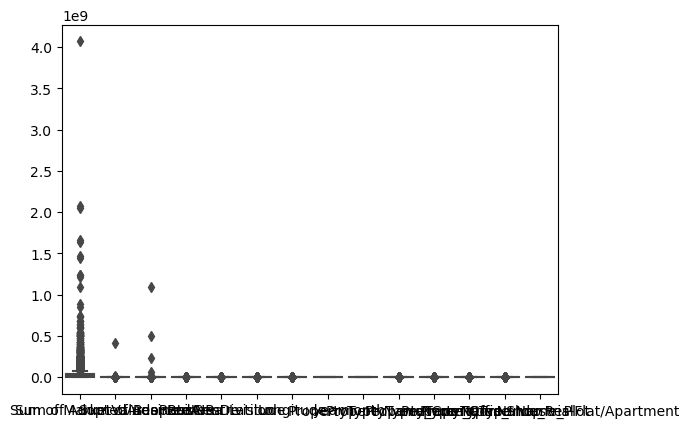

In [30]:
# lets train test split 
from sklearn.model_selection import train_test_split,GridSearchCV
sns.boxplot(kotak_housing)


In [35]:
# lets do the scaling of the data 
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X=kotak_housing.drop(labels=['Sum of MarketValue'],axis=1)
y=kotak_housing['Sum of MarketValue']

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [39]:
X_train_scaled=std.fit_transform(X_train)

In [61]:
X_test_scaled=std.transform(X_test)

<AxesSubplot:>

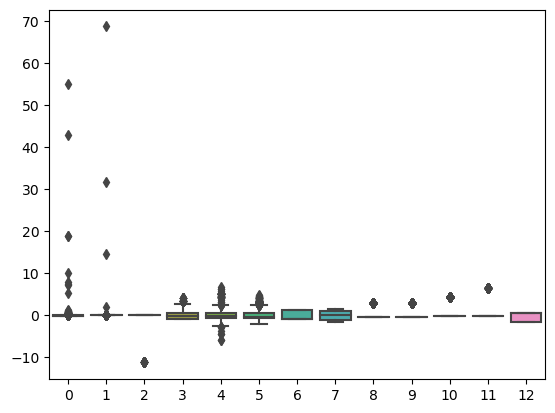

In [41]:
sns.boxplot(X_train_scaled)

In [62]:
from scipy import stats
X_train_scaled_1=X_train_scaled[(np.abs(stats.zscore(X_train_scaled)) < 3).all(axis=1)]
y_train_scaled=y_train[(np.abs(stats.zscore(y_train)) < 3).all(axis=1)]

ValueError: No axis named 1 for object type Series

<AxesSubplot:>

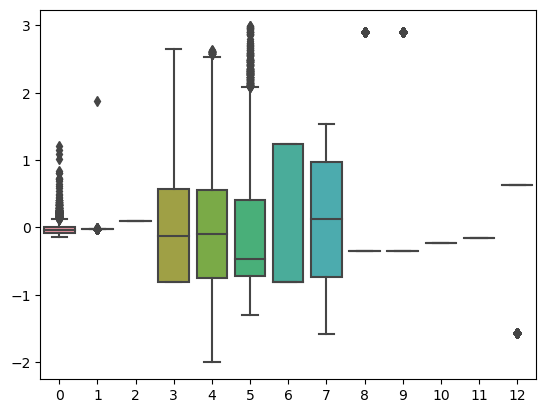

In [44]:
sns.boxplot(X_train_scaled_1)

In [51]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(random_state=2)
from sklearn.metrics import mean_absolute_error,mean_squared_error,log_loss,r2_score,mean_squared_log_error

In [65]:
cv_params={'criterion':['squared_error', 'absolute_error', 'poisson'],
           'n_estimators':[10,25,50],
           'max_depth':[1,2],
           'max_features':['sqrt', 'log2', None]
}



In [66]:
cv_reg=GridSearchCV(reg,cv_params,verbose=10,cv=5,refit='f1')

In [67]:
cv_reg.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=squared_error, max_depth=1, max_features=sqrt, n_estimators=10
[CV 1/5; 1/54] END criterion=squared_error, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.086 total time=   0.0s
[CV 2/5; 1/54] START criterion=squared_error, max_depth=1, max_features=sqrt, n_estimators=10
[CV 2/5; 1/54] END criterion=squared_error, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.016 total time=   0.0s
[CV 3/5; 1/54] START criterion=squared_error, max_depth=1, max_features=sqrt, n_estimators=10
[CV 3/5; 1/54] END criterion=squared_error, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.062 total time=   0.0s
[CV 4/5; 1/54] START criterion=squared_error, max_depth=1, max_features=sqrt, n_estimators=10
[CV 4/5; 1/54] END criterion=squared_error, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.039 total time=   0.0s
[CV 5/5; 1/54] START criterion=squared_error, max_depth=1, max

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [1, 2],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 25, 50]},
             refit='f1', verbose=10)

In [68]:
cv_reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 50}

In [69]:
reg_best=RandomForestRegressor(criterion='squared_error',max_depth=2,max_features=None,n_estimators=50)

In [70]:
reg_best.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=2, max_features=None, n_estimators=50)

In [71]:
y_pred=reg_best.predict(X_test)

c:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [76]:
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1601224428.4259734
2.577387333839887e+18
-508.0539182282113
